In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [62]:
pd.set_option('display.max_rows',1900)

In [2]:
y12=pd.read_csv('C://Users//admin//Documents//git//Final//Iowa_sales//year2012.csv')

In [4]:
y12=y12[y12['City']=='DES MOINES']

In [6]:
f12=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2012.csv')
f12=f12.drop('Unnamed: 0',axis=1)

In [15]:
def change_dtypes(x):
    x['Date']=pd.to_datetime(x['Date'])
    x['Vendor Number']=x['Vendor Number'].astype(str)
    x['Store Number']=x['Store Number'].astype(str)
    x['Item Number']=x['Item Number'].astype(str)
    return x

In [16]:
f12=change_dtypes(f12)

In [17]:
f12.dtypes

Date                    datetime64[ns]
Store Number                    object
Category Name                   object
Vendor Number                   object
Item Number                     object
Item Description                object
Pack                             int64
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                     int64
Sale (Dollars)                 float64
Volume Sold (Liters)           float64
dtype: object

In [12]:
m12=f12[['Store Number','Vendor Number','Item Number','Volume Sold (Liters)','Item Description','State Bottle Cost','Bottles Sold']]

In [13]:
m12.isna().sum()

Store Number            0
Vendor Number           0
Item Number             0
Volume Sold (Liters)    0
Item Description        0
State Bottle Cost       0
Bottles Sold            0
dtype: int64

In [19]:
def multi(x,y):
    return x*y

In [20]:
m12['Total Cost']=list(map(multi,m12['State Bottle Cost'],m12['Bottles Sold']))

<ipython-input-20-333db58c2945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['Total Cost']=list(map(multi,m12['State Bottle Cost'],m12['Bottles Sold']))


In [ ]:
m12.drop('Item Description',axis=1,inplace=True)

In [22]:
m12.columns=['Store_Number','Vendor_Number','Item_Number','Volume_Sold_(Liters)','Item_Description','State_Bottle_Cost','Bottles_Sold','Total_Cost']

# Below is work on aggregating columns, finding appropriate bin #, and reapplying to Datafram

In [25]:
itemnumdf=m12.groupby(['Item_Number']).agg({'State_Bottle_Cost':['mean']})
itemnumdf=itemnumdf.reset_index()
itemnumdf.columns =['Item Number','CPB']
#itemnumdf=itemnumdf[itemnumdf['Item Number']!=903056]

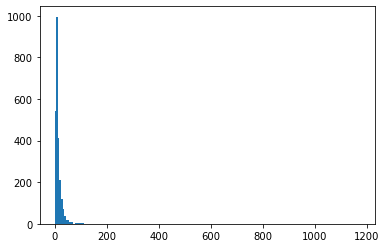

In [26]:
plt.hist(itemnumdf.CPB,bins=200)
plt.show()

In [36]:
itemnumdf.describe()

,Item Number,CPB
count,2484.000000,2484.000000
mean,304579.888084,14.754745
std,395076.671240,31.109285
min,413.000000,0.000000
25%,35465.750000,6.250000
50%,64401.000000,9.577455
75%,901077.250000,15.740000
max,988536.000000,1170.646667


In [ ]:
itemnumdf.columns =['Item Number','CPB']

In [45]:
iqr=itemnumdf.describe().T['75%'].T['CPB']-itemnumdf.describe().T['25%'].T['CPB']
iqr

9.490000000000004

In [40]:
ul=(itemnumdf.describe().T['75%'].T['CPB'])+1.5*iqr
ul

29.97500000000001

In [41]:
len(itemnumdf['CPB'])

2484

In [42]:
len(itemnumdf[itemnumdf['CPB']<ul])

2297

In [46]:
newcpb=itemnumdf[itemnumdf['CPB']<30.]

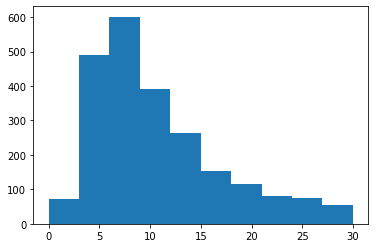

In [110]:
plt.hist(newcpb.CPB,bins=10)
plt.show()

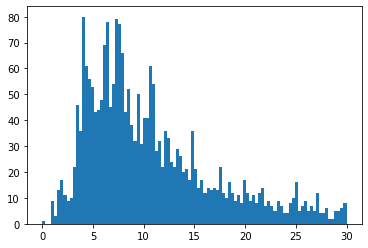

In [58]:
plt.hist(newcpb.CPB,bins=100)
plt.show()

In [98]:
ncpb=pd.DataFrame(newcpb['CPB'].value_counts())
#pandas. DataFrame. sort_values(columns, ascending=True)

In [99]:
ncpb.sort_values('CPB',ascending=False)

,CPB
5.000000,14
10.000000,13
12.500000,12
4.000000,11
11.000000,10
14.980000,9
10.500000,8
13.560000,8
8.000000,7
20.000000,7


In [100]:
ncpb=ncpb.reset_index()

In [101]:
ncpb=ncpb.sort_values('index')
ncpb.columns=('CPB','Count')

In [104]:
ncpb['CPB']=list(map(lambda x:round(x,1),ncpb['CPB']))

In [105]:
ncpb

,CPB,Count
1002,0.0,1
1248,0.0,1
654,0.0,1
1224,0.0,1
1487,0.0,1
1496,0.0,1
1356,0.0,1
1280,0.0,1
1583,0.0,1
698,0.0,1


In [43]:
ul=(itemnumdf.describe().T['75%'].T['CPB'])+2*iqr
ul

34.72000000000001

In [44]:
len(itemnumdf[itemnumdf['CPB']<ul])

2345

In [ ]:
plt.boxplot(itemnumdf.CPB)
plt.show()

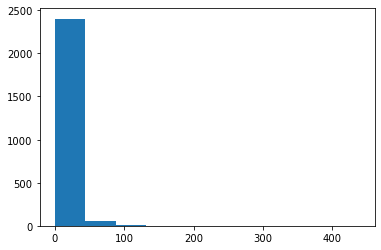

In [61]:
plt.hist(itemnumdf.CPB,bins=10)
plt.show()

In [67]:
m12['Item_Split']=pd.DataFrame(pd.cut(itemnumdf['CPB'],5,labels=['low','medlow','med','medhigh','high']))
m12.head(3)

C:\Users\admin\AppData\Local\Temp/ipykernel_38216/1419615687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['Item_Split']=pd.DataFrame(pd.cut(itemnumdf['CPB'],5,labels=['low','medlow','med','medhigh','high']))


,Store_Number,Vendor_Number,Item_Number,Volume_Sold_(Liters),Item_Description,State_Bottle_Cost,Bottles_Sold,Total_Cost,Item_Split
11,2532,192.0,65256,9.0,Jagermeister Liqueur,11.58,12,138.96,low
31,2633,260.0,5289,12.0,J & B Rare Scotch,14.98,12,179.76,low
36,2959,35.0,43038,10.5,Bacardi Gold Rum,14.67,6,88.02,low


In [68]:
vendf=m12.groupby(['Vendor_Number']).agg({'State_Bottle_Cost':['mean']})
vendf=vendf.reset_index()
vendf.columns =['Vendor_Number','CPB']
#vendf=vendf[vendf['Vendor_Number']!=903056]

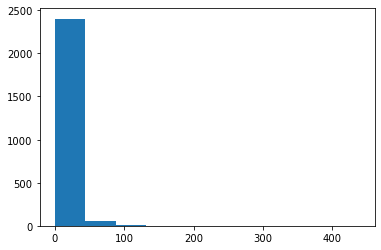

In [69]:
plt.hist(itemnumdf.CPB,bins=10)
plt.show()

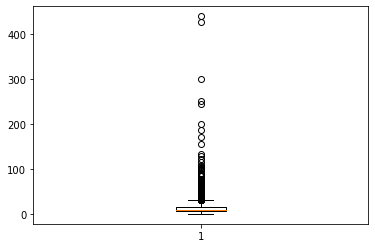

In [71]:
plt.boxplot(itemnumdf.CPB)
plt.show()

In [2]:
(itemnumdf['CPB']).describe()

NameError: name 'itemnumdf' is not defined